In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('./data/toluca_company_dataset.csv')

In [ ]:
df.head()

,Lot_size,Work_hours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


## 데이터의 분포 보기
- 회귀분석은 연속형 데이터일때만 가능함
- 산점도 통해서 봐보기

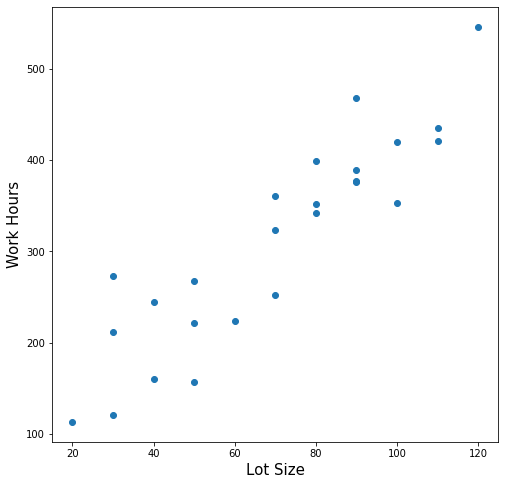

In [ ]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

### Result
- 데이터의 분포가 제품크기가 증가할수록 작업 시간도 증가하는 패턴을 보임


## 회귀모형 적합시키기 (Statsmodel 사용)
- work hours : 반응변수 , lot size: 설명변수 
- 회귀모형 적합
- statsmodel의 api 사용
  - ols(' 반응변수 ~ 설명변수1 + 설명변수2 +....', data=데이터명)fit()
  - ols는 기본적으로 절편항도 추정함, 제외하고 싶으면 ' 반응변수 ~ 설명변수1 + 설명변수2 +....-1'해줄 것
- summary 함수 이용해서 적합한 결과를 보여줌

In [ ]:
## states model 사용
fit = ols('Work_hours ~ Lot_size',data=df).fit() ## 단순선형회귀모형 적합

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           4.45e-10
Time:                        07:35:49   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result
1. R-squared=0.822 로 회귀모형의 설명력이 82.2%가 된다는 것임
2. F값 = 105.9, 이때의 유의확률은(Pr >F) =0.000으로 통계적으로 유의한 모형임
3. Intercept의 t값이 0.382, P>|t|=0.025 이므로 회귀모형의 절편값은 유의하다
  또한, 그 값은 62.3659로 나타남
4. 'lot size'의 t값은 10.290, P>|t|=0.000이므로 lot_size변수도 유의하므로 lot_size의 계수는 3.5702으로 도출.  
#### 따라서, 이 회귀 모형의 식은  y(i)=62.3659+3.5702 * 'lot_size'
- 사이즈가 1만큼 증가할수록 work_hours는 3.5702만큼 증가한다. 
- 사이즈 증가가 일하는 시간에 많은 영향을 미친다는 것을 알았음 대안 필요




## 회귀모형 결과 해석 방법
1. 결정계수 확인 (R-squared)
2. 모형의 적합도 확인 (F값, p-value)
3. 회귀 계수 확인
  - Intercept(절편)은 모든 독립변수가 0일 때 예측되는 값 말함
4. t값과 t값의 유의확률 확인

## 모델 적합 (Sklearn)
- LinearRegression class의 fit메서드 이용
- 설명변수의 차원을 하나 증가시켜야함

In [ ]:
x=df['Lot_size'].values.reshape(-1,1)
x

array([[ 80],
       [ 30],
       [ 50],
       [ 90],
       [ 70],
       [ 60],
       [120],
       [ 80],
       [100],
       [ 50],
       [ 40],
       [ 70],
       [ 90],
       [ 20],
       [110],
       [100],
       [ 30],
       [ 50],
       [ 90],
       [110],
       [ 30],
       [ 90],
       [ 40],
       [ 80],
       [ 70]])

In [ ]:
y=df['Work_hours']

In [ ]:
fit=LinearRegression().fit(x,y) #단순선형회귀모형 적합

In [ ]:
# 추정값 보기
fit.intercept_ # 절편

62.36585858585849

In [ ]:
# 기울기
fit.coef_

array([3.57020202])